In [3]:
from tqdm import tqdm
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
enwik6 = open('enwik3', 'rb').read()

**Compression**

= Coding + Modelling

Coding: How to store symbols.  
Modelling: Which symbols are more probable.

We want to code the most probable symbols in the least amount of bits. And vice versa.

Coding is largely solved (arithmetic coding)  
Modelling is proven unsolvable.

In [6]:
enwik6_zip = open('enwik3.zip', 'rb').read()

In [7]:
len(enwik6) / len(enwik6_zip)

1.968503937007874

**Baseline Compression factors (enwik6)**:  

| Model | bpc |
|-------|-------|
| Gzip Compression | 2.8007440895361713 (actual) |
| Simple Byte Frequency | 1.320 (worst case) |
| byte tri gram | 1.710 (worst case) |
| starlit | 8.68 (on enwik9) |

Shannon and Weaver (1949) proved that the best you can do for a symbol with probability p is assign a code
of length $log_2 1/p$

Simple char frequency (0 order model)

In [9]:
freqs = defaultdict(int)
bits = 0
total = 0
for i in tqdm(enwik6):
    bits += math.log2(1 / ((freqs[i] + 1)/(total + 256)))  
    freqs[i] += 1
    total += 1

100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 2016492.31it/s]


In [10]:
len(enwik6) / (bits/8)

1.4544341956495894

In [11]:
bits / 8

687.5525912352282

n-grams

In [12]:
class Ngram_model:
    def __init__(self, n):
        self.n = n
        self.freqs = defaultdict(lambda: defaultdict(int)) #freqs[context][char] = count
        
    def get_bits(self, enwik):
        bits = 0
        total = 0
        context = enwik[:self.n]
        for i in (enwik[self.n:]):
            prob = ((self.freqs[context][i] + 1) / (sum(self.freqs[context].values()) + 256))
        #     print(freqs[context][i], prob)
            bits += math.log2(1 / prob)   
            self.freqs[context][i] += 1 
            context += bytes([i])
            context = context[-self.n:]
        return bits

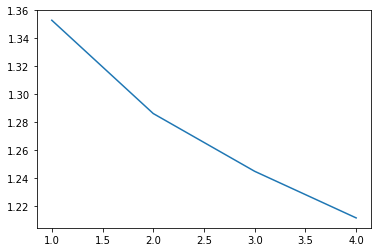

In [13]:
models = [Ngram_model(i) for i in range(1,5)]
bits = len(enwik6) / (np.array([m.get_bits(enwik6) for m in models])/8)
plt.plot(range(1,5), bits)

In [15]:
(np.array([m.get_bits(enwik6) for m in models])/8)

array([562.14777822, 594.4770994 , 624.41473396, 650.7992537 ])

TODO: Backoff would be nice also the thing where all less n grams are used with some weights

**Arithmetic Coding**

In [ ]:
class Model:
    def __init__(self, string):
        self.freqs = defaultdict(lambda x: 0)
        for char in string:
            if char not in self.freqs.keys():
                self.freqs[char] = 0
            self.freqs[char] += 1
        for k,v in self.freqs.items():
            self.freqs[k] = v/len(string)
    def __call__(self,char):
        return self.freqs[char]
    def display_probs(self):
        for k, v in self.freqs.items():
            print(f"{k}: {v}")

In [ ]:
def string_to_bin(string):
    new_string = ''
    for char in string:
        new_string += bin(ord(char))[2:]
    return new_string

In [ ]:
string = 'Fakhir'

In [ ]:
bin_string = string_to_bin(string)
bin_string

In [ ]:
m = Model(bin_string)
m.display_probs()

In [ ]:
#encoding
high, low = 1.0, 0.0
for s in bin_string:
    if s == '1':
        low = low + (high - low) * m(s)
    else:
        high = low + (high - low) * (1-m(s))
    assert high > low

In [ ]:
final_ans = high - (high-low)*0.5
assert final_ans < high
assert final_ans > low

In [ ]:
final_ans

In [ ]:
m.freqs['0']

In [ ]:
#decoding
high, low = 1.0, 0.0
decompressed = ''
for i in range(len(bin_string)): #len is cheating
    middle = high - (high - low)*m.freqs['0']
    if final_ans < middle:
        decompressed += '0'
        high = low + (high - low) * (1-m('0'))
    else:
        decompressed += '1'
        low = low + (high - low) * m('1')
    assert high > low

In [ ]:
assert decompressed == bin_string